In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])

import sys
sys.path.insert(0, '../src/pydftlj/')
from dft3dgpu import dft3d
from eos import LJEOS 

# Author: Elvis do A. Soares
# Github: @elvissoares
# Date: 2023-05-25

/home/elvis/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


# Hard-Sphere Fluid Near Hardwall

In [2]:
sigmaff = 1.0

In [3]:
Lz = 20.0*sigmaff
print('Z length: ', Lz)

Nz = int(Lz/(0.01*sigmaff))

Z length:  20.0


In [4]:
DFTRF = dft3d(gridsize=np.array([0,0,Nz]),fmtmethod='RF',ljmethod='None',padding=True)
DFTRF.Set_FluidProperties(sigma=sigmaff,epsilon=0.0)
DFTRF.Set_Geometry(Lz)

In [5]:
DFTWBI = dft3d(gridsize=np.array([0,0,Nz]),fmtmethod='WBI',ljmethod='None',padding=False)
DFTWBI.Set_FluidProperties(sigma=sigmaff,epsilon=0.0)
DFTWBI.Set_Geometry(Lz)

In [6]:
DFTWBII = dft3d(gridsize=np.array([0,0,Nz]),fmtmethod='WBII',ljmethod='None',padding=False)
DFTWBII.Set_FluidProperties(sigma=sigmaff,epsilon=0.0)
DFTWBII.Set_Geometry(Lz)

In [7]:
DFTRF.Set_Temperature(1.0)
DFTWBI.Set_Temperature(1.0)
DFTWBII.Set_Temperature(1.0)

In [8]:
Vext = np.zeros((DFTRF.Ngrid[0],DFTRF.Ngrid[1],DFTRF.Ngrid[2]))
# 
Vext[:,:,:50+DFTRF.Npad[2]] = np.inf
Vext[:,:,-(50+DFTRF.Npad[2]):] = np.inf
# Vext[:,:,:50] = np.inf
# Vext[:,:,-50:] = np.inf

DFTRF.Set_External_Potential(Vext)

In [9]:
Vext = np.zeros((DFTWBI.Ngrid[0],DFTWBI.Ngrid[1],DFTWBI.Ngrid[2]))
# 
Vext[:,:,:50] = np.inf
Vext[:,:,-50:] = np.inf

DFTWBI.Set_External_Potential(Vext)

In [10]:
Vext = np.zeros((DFTWBII.Ngrid[0],DFTWBII.Ngrid[1],DFTWBII.Ngrid[2]))
# 
Vext[:,:,:50] = np.inf
Vext[:,:,-50:] = np.inf

DFTWBII.Set_External_Potential(Vext)

In [11]:
eta = 0.4257
rhob = eta/(np.pi*sigmaff**3/6)

In [12]:
# Rosenfeld Functional

DFTRF.Set_BulkDensity(rhob)
DFTRF.Set_InitialCondition()

DFTRF.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [13]:
# White-Bear Mark I

DFTWBI.Set_BulkDensity(rhob)
DFTWBI.Set_InitialCondition()

DFTWBI.Calculate_Equilibrium(alpha0=0.25,dt=0.1,method='fire',logoutput=False)

In [15]:
# White-Bear Mark II

DFTWBII.Set_BulkDensity(rhob)
DFTWBII.Set_InitialCondition()

DFTWBII.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [16]:
dataMC = np.loadtxt('../examples/data/MC/hardwall-eta0.4257.dat')

Text(0, 0.5, '$\\rho(z)\\sigma^3$')

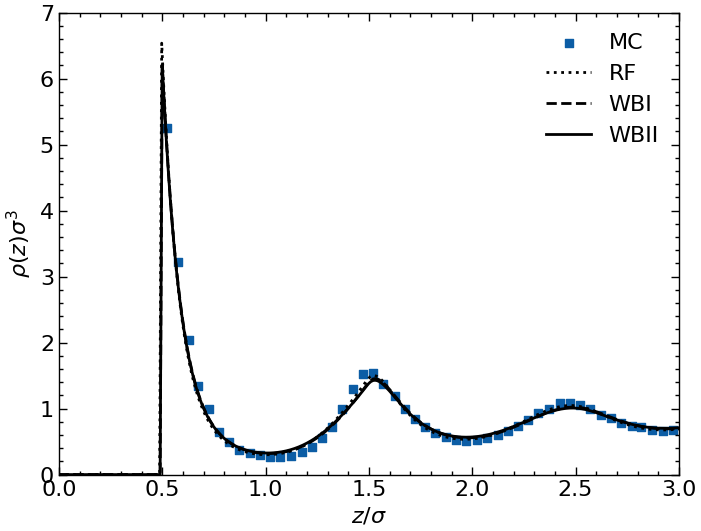

In [17]:
plt.scatter(dataMC.T[0],dataMC.T[1],marker='s',label='MC')
plt.plot(DFTRF.Z[0,0,:]+0.5*DFTRF.Lcell,DFTRF.rho[0,0,:].cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.Z[0,0,:]+0.5*DFTWBI.Lgrid,DFTWBI.rho[0,0,:].cpu(),'--',color='k',label='WBI')
plt.plot(DFTWBII.Z[0,0,:]+0.5*DFTWBII.Lgrid,DFTWBII.rho[0,0,:].cpu(),'-',color='k',label='WBII')
plt.legend(loc='best')
plt.ylim(0,7)
plt.xlim(0.0,3)
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')

Text(0, 0.5, '$\\rho(z)\\sigma^3$')

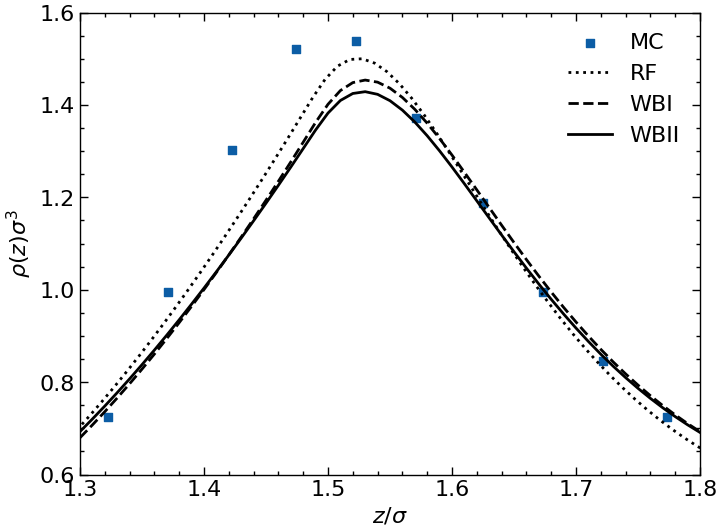

In [18]:
plt.scatter(dataMC.T[0],dataMC.T[1],marker='s',label='MC')
plt.plot(DFTRF.Z[0,0,:]+0.5*DFTRF.Lcell,DFTRF.rho[0,0,:].cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.Z[0,0,:]+0.5*DFTWBI.Lgrid,DFTWBI.rho[0,0,:].cpu(),'--',color='k',label='WBI')
plt.plot(DFTWBII.Z[0,0,:]+0.5*DFTWBII.Lgrid,DFTWBII.rho[0,0,:].cpu(),'-',color='k',label='WBII')
plt.legend(loc='best')
plt.ylim(0.6,1.6)
plt.xlim(1.3,1.8)
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')

In [19]:
eta = 0.4783
rhob = eta/(np.pi*sigmaff**3/6)

print('rhob = ',rhob)

rhob =  0.9134857113702426


In [20]:
# Rosenfeld Functional

DFTRF.Set_BulkDensity(rhob)
DFTRF.Set_InitialCondition()

DFTRF.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [21]:
# White-Bear Mark I

DFTWBI.Set_BulkDensity(rhob)
DFTWBI.Set_InitialCondition()

DFTWBI.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [22]:
# White-Bear Mark II

DFTWBII.Set_BulkDensity(rhob)
DFTWBII.Set_InitialCondition()

DFTWBII.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [23]:
dataMC = np.loadtxt('../examples/data/MC/hardwall-eta0.4783.dat')

Text(0, 0.5, '$\\rho(z)\\sigma^3$')

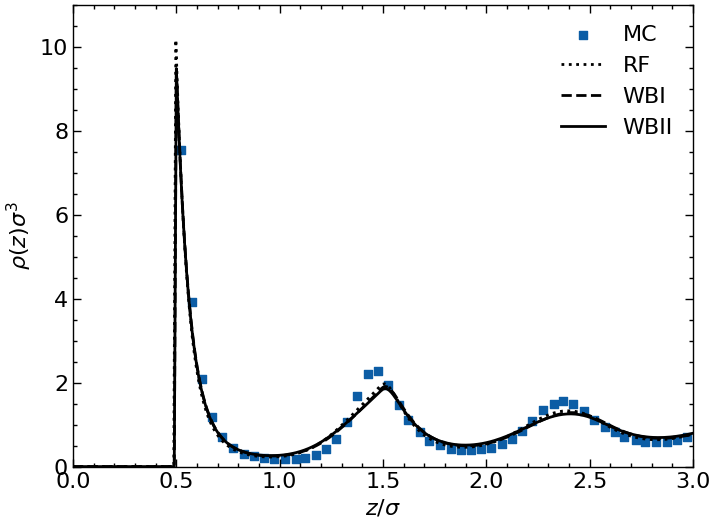

In [25]:
plt.scatter(dataMC.T[0],dataMC.T[1],marker='s',label='MC')
plt.plot(DFTRF.Z[0,0,:]+0.5*DFTRF.Lcell,DFTRF.rho[0,0,:].cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.Z[0,0,:]+0.5*DFTWBI.Lgrid,DFTWBI.rho[0,0,:].cpu(),'--',color='k',label='WBI')
plt.plot(DFTWBII.Z[0,0,:]+0.5*DFTWBII.Lgrid,DFTWBII.rho[0,0,:].cpu(),'-',color='k',label='WBII')
plt.legend(loc='best')
plt.ylim(0,11)
plt.xlim(0.0,3)
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')

Text(0, 0.5, '$\\rho(z)\\sigma^3$')

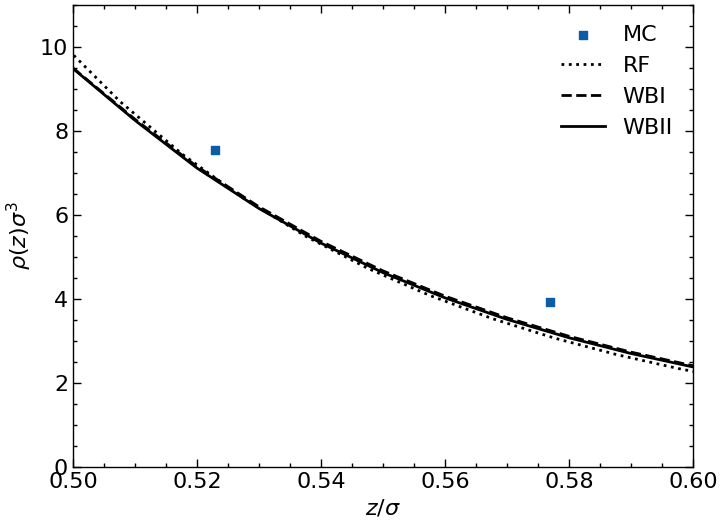

In [26]:
plt.scatter(dataMC.T[0],dataMC.T[1],marker='s',label='MC')
plt.plot(DFTRF.Z[0,0,:]+0.5*DFTRF.Lcell,DFTRF.rho[0,0,:].cpu(),':',color='k',label='RF')
plt.plot(DFTWBI.Z[0,0,:]+0.5*DFTWBI.Lgrid,DFTWBI.rho[0,0,:].cpu(),'--',color='k',label='WBI')
plt.plot(DFTWBII.Z[0,0,:]+0.5*DFTWBII.Lgrid,DFTWBII.rho[0,0,:].cpu(),'-',color='k',label='WBII')
plt.legend(loc='best')
plt.ylim(0,11)
plt.xlim(0.5,0.6)
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')

In [28]:
del DFTRF, DFTWBI, DFTWBII

NameError: name 'DFTRF' is not defined

# LJ Fluid Near Hardwall

In [2]:
sigmaff = 1.0
epsilonff = 1.0

In [3]:
Lz= 20.0*sigmaff
print('Z dimensions: ', Lz)

Z dimensions:  20.0


In [4]:
Nz = int(Lz/(0.01*sigmaff))

In [5]:
DFTWDA = dft3d(gridsize=np.array([0,0,Nz]),ljmethod='WDA',padding=True,padding_value='zero')
DFTWDA.Set_FluidProperties(sigma=sigmaff,epsilon=epsilonff)
DFTWDA.Set_Geometry(Lz)

In [6]:
DFTMMFA = dft3d(gridsize=np.array([0,0,Nz]),ljmethod='MMFA',padding=True,padding_value='zero')
DFTMMFA.Set_FluidProperties(sigma=sigmaff,epsilon=epsilonff)
DFTMMFA.Set_Geometry(Lz)

In [7]:
Vext = np.zeros((DFTWDA.Ngrid[0],DFTWDA.Ngrid[1],DFTWDA.Ngrid[2]))

# epsilonw = 2*np.pi*epsilonff
# Delta = sigmaff/np.sqrt(2)
# sigmaw = sigmaff

# Z = (DFT.Z+0.5*DFT.L[2]+1e-30)
# Vext[:,:,:] = epsilonw*(0.4*(sigmaw/Z)**10-(sigmaw/Z)**4-sigmaw**4/(3*Delta*(Z+0.61*Delta)**3)) 
# Z = (0.5*DFT.L[2]-DFT.Z+1e-30)
# Vext[:,:,:] += epsilonw*(0.4*(sigmaw/Z)**10-(sigmaw/Z)**4-sigmaw**4/(3*Delta*(Z+0.61*Delta)**3)) 
# 
Vext[:,:,:50+DFTWDA.Npad[2]] = np.inf
Vext[:,:,-(50+DFTWDA.Npad[2]):] = np.inf

DFTWDA.Set_External_Potential(Vext)

In [8]:
Vext = np.zeros((DFTMMFA.Ngrid[0],DFTMMFA.Ngrid[1],DFTMMFA.Ngrid[2]))

# epsilonw = 2*np.pi*epsilonff
# Delta = sigmaff/np.sqrt(2)
# sigmaw = sigmaff

# Z = (DFT.Z+0.5*DFT.L[2]+1e-30)
# Vext[:,:,:] = epsilonw*(0.4*(sigmaw/Z)**10-(sigmaw/Z)**4-sigmaw**4/(3*Delta*(Z+0.61*Delta)**3)) 
# Z = (0.5*DFT.L[2]-DFT.Z+1e-30)
# Vext[:,:,:] += epsilonw*(0.4*(sigmaw/Z)**10-(sigmaw/Z)**4-sigmaw**4/(3*Delta*(Z+0.61*Delta)**3)) 
# 
Vext[:,:,:50+DFTMMFA.Npad[2]] = np.inf
Vext[:,:,-(50+DFTMMFA.Npad[2]):] = np.inf

DFTMMFA.Set_External_Potential(Vext)

In [9]:
kT = 1.35 
rhob = 0.5

In [10]:
DFTWDA.Set_Temperature(kT)
DFTMMFA.Set_Temperature(kT)

In [11]:
DFTWDA.Set_BulkDensity(rhob)
DFTWDA.Set_InitialCondition()

DFTWDA.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

/home/elvis/Google Drive/Projetos em Andamento/2-DFT in Amorphous Carbon/codes/PyDFTlj/examples/../src/pydftlj/dft3dgpu.py:257: RuntimeWarning: invalid value encountered in dphi3dnfuncWBI
  self.dphi3dn3 = torch.tensor(dphi3dnfuncWBI(self.n3.numpy()),dtype=torch.float32)


In [12]:
DFTMMFA.Set_BulkDensity(rhob)
DFTMMFA.Set_InitialCondition()

DFTMMFA.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [13]:
dataMC = np.loadtxt('../examples/data/MC/lj-hardwall-rhob0.5-T1.35.dat')

(0.0, 6.0)

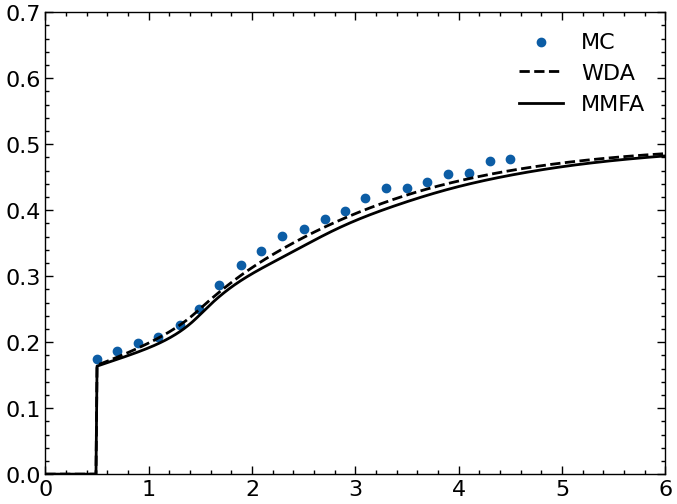

In [14]:
plt.scatter(dataMC.T[0]+0.5,dataMC.T[1],marker='o',label='MC')
plt.plot(DFTWDA.Z[0,0,:]+0.5*DFTWDA.Lcell,DFTWDA.rho[0,0,:].cpu(),'--',color='k',label='WDA')
plt.plot(DFTMMFA.Z[0,0,:]+0.5*DFTMMFA.Lcell,DFTMMFA.rho[0,0,:].cpu(),'-',color='k',label='MMFA')
plt.legend(loc='best')
plt.ylim(0,0.7)
plt.xlim(0.0,6)

In [15]:
rhob = 0.65

In [16]:
DFTWDA.Set_BulkDensity(rhob)
DFTWDA.Set_InitialCondition()

DFTWDA.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [17]:
DFTMMFA.Set_BulkDensity(rhob)
DFTMMFA.Set_InitialCondition()

DFTMMFA.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [18]:
dataMC = np.loadtxt('../examples/data/MC/lj-hardwall-rhob0.65-T1.35.dat')

Text(0, 0.5, '$\\rho(z)\\sigma^3$')

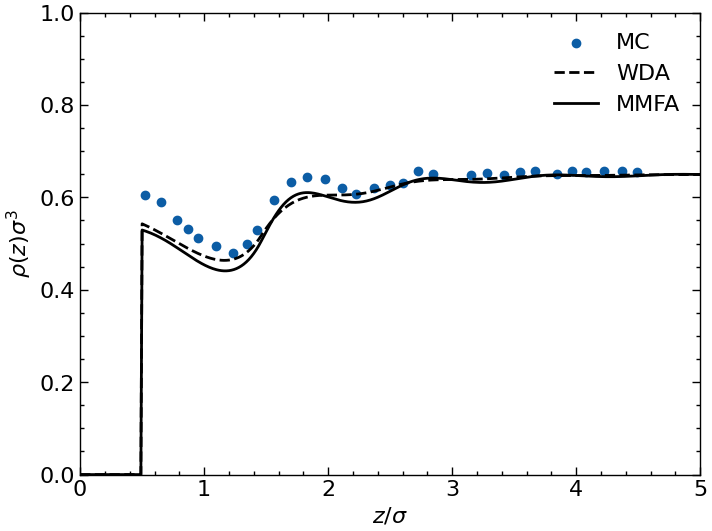

In [19]:
plt.scatter(dataMC.T[0]+0.5,dataMC.T[1],marker='o',label='MC')
plt.plot(DFTWDA.Z[0,0,:]+0.5*DFTWDA.Lcell,DFTWDA.rho[0,0,:].cpu(),'--',color='k',label='WDA')
plt.plot(DFTMMFA.Z[0,0,:]+0.5*DFTMMFA.Lcell,DFTMMFA.rho[0,0,:].cpu(),'-',color='k',label='MMFA')
plt.ylim(0,1)
plt.xlim(0.0,5)
plt.legend(loc='best')
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')

In [20]:
rhob = 0.82

In [21]:
DFTWDA.Set_BulkDensity(rhob)
DFTWDA.Set_InitialCondition()

DFTWDA.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [22]:
DFTMMFA.Set_BulkDensity(rhob)
DFTMMFA.Set_InitialCondition()

DFTMMFA.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [23]:
dataMC = np.loadtxt('../examples/data/MC/lj-hardwall-rhob0.82-T1.35.dat')

Text(0, 0.5, '$\\rho(z)\\sigma^3$')

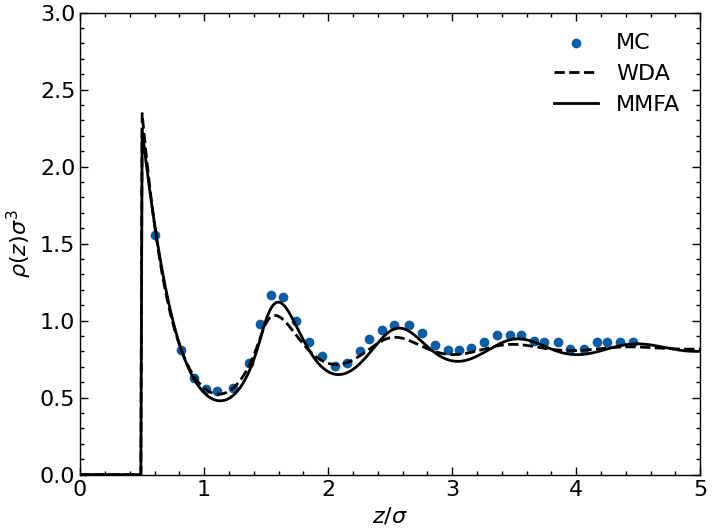

In [24]:
plt.scatter(dataMC.T[0]+0.5,dataMC.T[1],marker='o',label='MC')
plt.plot(DFTWDA.Z[0,0,:]+0.5*DFTWDA.Lcell,DFTWDA.rho[0,0,:].cpu(),'--',color='k',label='WDA')
plt.plot(DFTMMFA.Z[0,0,:]+0.5*DFTMMFA.Lcell,DFTMMFA.rho[0,0,:].cpu(),'-',color='k',label='MMFA')
plt.ylim(0,3)
plt.xlim(0.0,5)
plt.legend(loc='best')
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')

## Confined

In [29]:
kT = 1.2 
rhob = 0.5925

In [30]:
Lz= 7.5*sigmaff
print('Z dimensions: ', Lz)
Nz = int(Lz/(0.01*sigmaff))

Z dimensions:  7.5


In [31]:
DFTWDA = dft3d(gridsize=np.array([0,0,Nz]),ljmethod='WDA',padding=True,padding_value='zero')
DFTWDA.Set_FluidProperties(sigma=sigmaff,epsilon=epsilonff)
DFTWDA.Set_Geometry(Lz)

In [32]:
DFTMMFA = dft3d(gridsize=np.array([0,0,Nz]),ljmethod='MMFA',padding=True,padding_value='zero')
DFTMMFA.Set_FluidProperties(sigma=sigmaff,epsilon=epsilonff)
DFTMMFA.Set_Geometry(Lz)

In [33]:
DFTWDA.Set_Temperature(kT)
DFTMMFA.Set_Temperature(kT)

In [44]:
Vext = np.zeros((DFTWDA.Ngrid[0],DFTWDA.Ngrid[1],DFTWDA.Ngrid[2]))

epsilonw = 2*np.pi*epsilonff
Delta = sigmaff/np.sqrt(2)
sigmaw = sigmaff

Z = (DFTWDA.Z+0.5*DFTWDA.Lcell+1e-30)
Vext[:,:,:] = epsilonw*(0.4*(sigmaw/Z)**10-(sigmaw/Z)**4-sigmaw**4/(3*Delta*(Z+0.61*Delta)**3)) 
Z = (0.5*DFTWDA.Lcell-DFTWDA.Z+1e-30)
Vext[:,:,:] += epsilonw*(0.4*(sigmaw/Z)**10-(sigmaw/Z)**4-sigmaw**4/(3*Delta*(Z+0.61*Delta)**3)) 

# Vext[:,:,:50+DFTWDA.Npad[2]] = np.inf
# Vext[:,:,-(50+DFTWDA.Npad[2]):] = np.inf

DFTWDA.Set_External_Potential(Vext)

In [45]:
Vext = np.zeros((DFTMMFA.Ngrid[0],DFTMMFA.Ngrid[1],DFTMMFA.Ngrid[2]))

epsilonw = 2*np.pi*epsilonff
Delta = sigmaff/np.sqrt(2)
sigmaw = sigmaff

Z = (DFTMMFA.Z+0.5*DFTMMFA.Lcell+1e-30)
Vext[:,:,:] = epsilonw*(0.4*(sigmaw/Z)**10-(sigmaw/Z)**4-sigmaw**4/(3*Delta*(Z+0.61*Delta)**3)) 
Z = (0.5*DFTMMFA.Lcell-DFTMMFA.Z+1e-30)
Vext[:,:,:] += epsilonw*(0.4*(sigmaw/Z)**10-(sigmaw/Z)**4-sigmaw**4/(3*Delta*(Z+0.61*Delta)**3)) 

# Vext[:,:,:50+DFTWDA.Npad[2]] = np.inf
# Vext[:,:,-(50+DFTWDA.Npad[2]):] = np.inf

DFTMMFA.Set_External_Potential(Vext)

In [46]:
DFTWDA.Set_BulkDensity(rhob)
DFTWDA.Set_InitialCondition()

DFTWDA.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

/home/elvis/Google Drive/Projetos em Andamento/2-DFT in Amorphous Carbon/codes/PyDFTlj/examples/../src/pydftlj/dft3dgpu.py:257: RuntimeWarning: invalid value encountered in dphi3dnfuncWBI
  self.dphi3dn3 = torch.tensor(dphi3dnfuncWBI(self.n3.numpy()),dtype=torch.float32)


In [47]:
DFTMMFA.Set_BulkDensity(rhob)
DFTMMFA.Set_InitialCondition()

DFTMMFA.Calculate_Equilibrium(alpha0=0.1,dt=0.1,method='fire',logoutput=False)

In [48]:
dataMC = np.loadtxt('../examples/data/MC/lj-slitpore-steele-T1.2-rhob0.5925-H7.5-GEMC.dat')

Text(0, 0.5, '$\\rho(z)\\sigma^3$')

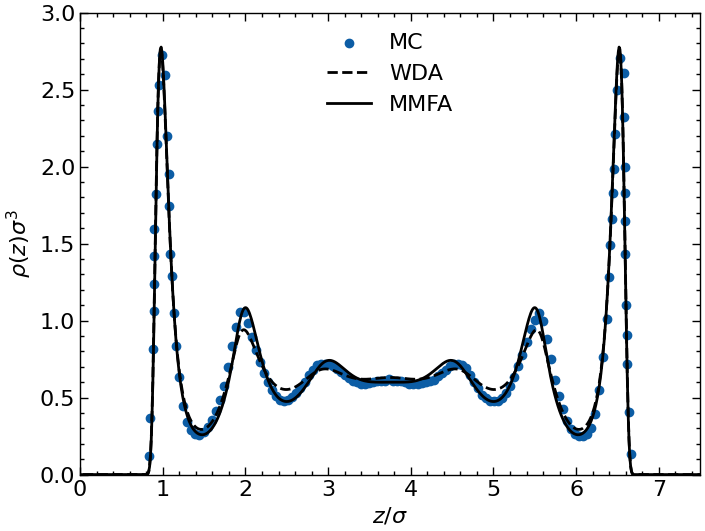

In [55]:
plt.scatter(dataMC.T[0],dataMC.T[1],marker='o',label='MC')
plt.plot(DFTWDA.Z[0,0,:]+0.5*DFTWDA.Lcell,DFTWDA.rho[0,0,:].cpu(),'--',color='k',label='WDA')
plt.plot(DFTMMFA.Z[0,0,:]+0.5*DFTMMFA.Lcell,DFTMMFA.rho[0,0,:].cpu(),'-',color='k',label='MMFA')
plt.ylim(0,3)
plt.xlim(0.0,7.5)
plt.legend(loc='best')
plt.xlabel(r'$z/\sigma$')
plt.ylabel(r'$\rho(z)\sigma^3$')